### Input and Output Features
- Input features = day, month, year, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWi
- Output feature = FWI (Fire Weather Index)

### Dataset
- This dataset is combination of two different datasets
- 1st Dataset = Records 1 to 122 - Bejaia Region Dataset 
- 2nd Dataset = Records 123 to 244 - Sidi Bel Abbes Region Dataset 


### Multi-collinearity
- Multi-collinearity is a statistical condition in which two or more predictor variables in a regression model are highly corelated (i.e. their colinear values are above a THRESHOLD) with each other.
- This means the predictors re giving overlapping or redundant information making it difficulr for hte model to understand the individual effect of each variable.
- Example:
- Imagine you’re predicting house price using:
  - number of rooms
  - square footage
- These two variables are strongly related — houses with more rooms usually have more square footage.
- So the model struggles to figure out:
- 👉 “Is the price increasing because there are more rooms or because the house is larger?”
- This confusion is called multicollinearity.
- The THRESHOLD mentioned above is decided by a Domain Expert.


### Ideal Split of a Dataset ###
- A dataset should ideally be split as shown in the diagram below.

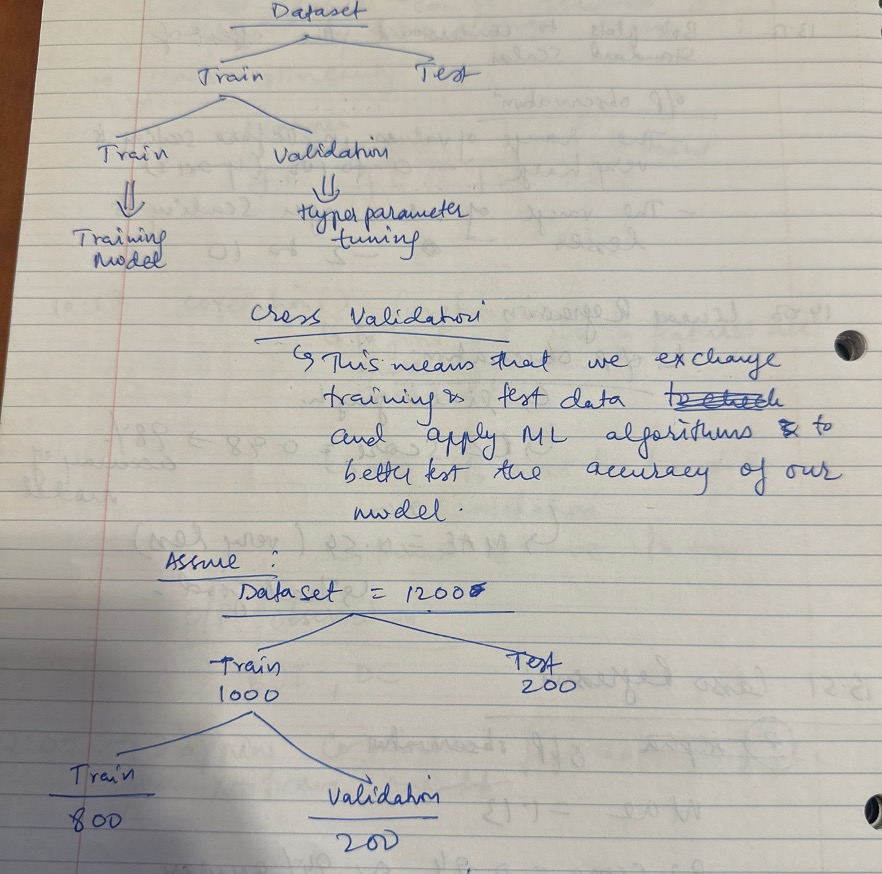

In [343]:
from IPython.display import Image
Image(filename='resources/ideal_split_of_dataset.jpg',height=500,width=800)

### Cross - Validation ###
- Cross Validation means that we exchange the training and test data and apply Machine Learning algorithms to better estimate the accuracy of our model
- Examples of Machine Learning Algorithms using Cross Validation
    - Lasso Cross Validation- Secion #12.3
    - Ridge Cross Validation - Secion #12.5
    - Elasticnet Cross Validation - Secion #12.7
- In the example below, we are assuming CV=5 (Cross Validation = 5)
- In each pass, The Test Data (of 200 records) keeps changing with Training Data
- In each pass, we calculate the new Accuracy of the model
- The final Accuracy is the Average of all Accuracies.
- The Validation data (shown in the diagram above - part of Training dataset) is used for Hyperparameter Tuning.

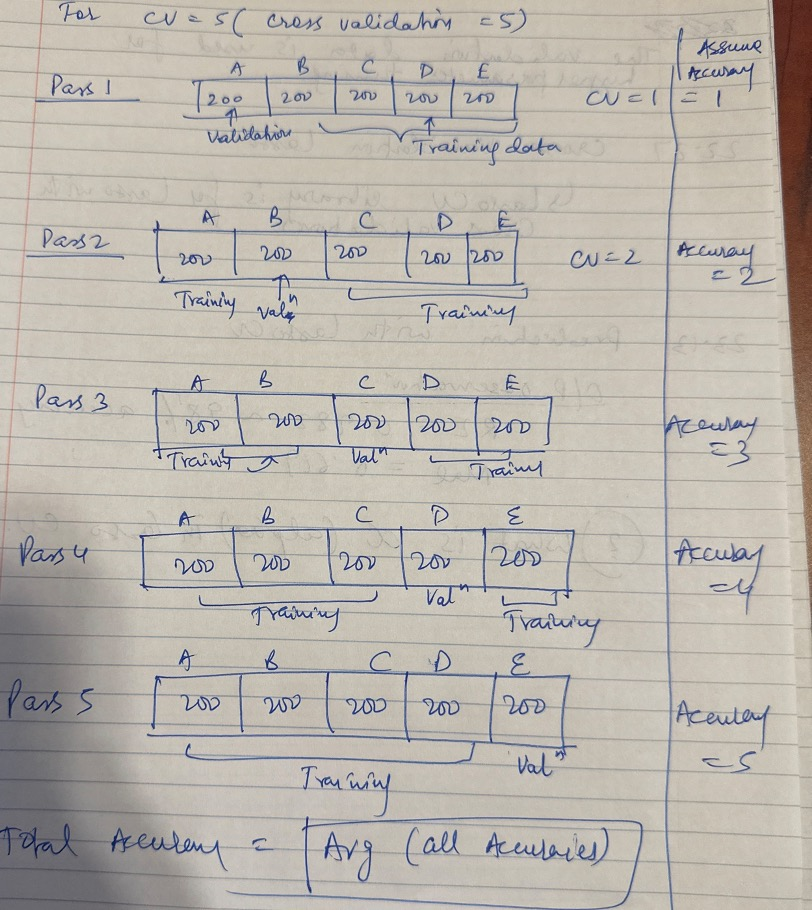

In [344]:
from IPython.display import Image
Image(filename='resources/how_cross_validation_works.jpg',height=500,width=800)

In [357]:
from sklearn.datasets import fetch_california_housing
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from  sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
%matplotlib inline

In [296]:
# Step 1) Load the dataset
# The actual column names are on the second row of the CSV file, 
# - header=1 means - 1st row is the header = Bejaia Region Dataset
dataset = pd.read_csv('./resources/1-Algerian_forest_fires_dataset_ORIGIONAL.csv',header=1)
dataset.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [297]:
# Step 2) Get metadata about the dataset

# 2.1) Get the datatypes of all the columns
# Output observation
# - All the datatypes are of the type Object
print('dataset.info() = ')
print(dataset.info())

# Print all the important metrics of the numerical columns of the dataset - mean, median, mode, standard-deviation
print('dataset.describe() = ')
print(dataset.describe())



dataset.info() = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB
None
dataset.describe() = 
        day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  24

In [298]:
#2.2) Check for any missing values(null values) in the dataset
# Output observation - 2 records has NaN values
# - axis=1 (means columnwise)
# - This filters the dataframe to show only the rows where at least one column is null
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [299]:
#2.3) Split the dataset according to Regions - Add a new column called 'Region'
# - 1st Dataset = Records 1 to 122 - Bejaia Region Dataset 
# - 2nd Dataset = Records 123 to 244 - Sidi Bel Abbes Region Dataset 
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset;

# Convert 'Region' column from float to int
df['Region'] = df['Region'].astype(float).astype(int)
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [300]:
# 2.4) Check for null values by column
# - how many null values each column has
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

### Cleaning the dataset

In [301]:
#Step 3) Cleaning the dataset

#3.1) Drop the rows with the null values and store the resultant dataframe in the origional datafram = df
# - There were only 2 records with null values (from #2.2)
df=df.dropna().reset_index(drop=True)

print('Nulls by columm: ',df.isnull().sum())

Nulls by columm:  day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [302]:
#3.2) Clean the data in row 122
# - Row 122 has column names instead of real data, this is where the second dataframe starts from

# df.iloc[122] - Returns a 1D result as a Pandas Series
# - This is like a single row pulled from a table

# df.iloc[[122]] - Returns a 2D result as a Pandas Dataframe 
# - This is like a table with a single row left in it.
df.iloc[[122]]

# Drop this row 122
df=df.drop(122).reset_index(drop=True)

# Check if row 122 is dropped
print('Row 122 = ',df.iloc[[122]])



Row 122 =      day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
122  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   

       Classes    Region  
122  not fire          1  


In [303]:
#3.3) Remove the leading spaces from column names
# Output Observation: Some columns like ' RH', ' Ws' have a leading space, remove them
print('column names (before strip)=', df.columns);

# Remove the leading space from column names
df.columns=df.columns.str.strip()

# Verify
print("column names (after strip)",df.columns)

column names (before strip)= Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')
column names (after strip) Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [304]:
# 3.4) Change datatypes of columns
# Most of the columns are currently object type. 
# They should ideally be:-
# - int type = day, month, year, Temperature, RH, Ws, Region
# - float type = Rain, FFMC, DMC, DC, ISI, BUI, FWI
# - object type = Classes - This column has classification data
df.head()

# Convert to int type
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

# Convert to float type
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### EDA = Exploratory Data Analysis ###


In [ ]:
# Step 4) EDA = Exploratory Data Analysis

#4.1) ENCODING - EDA on Categorical column = 'Classes' - Convert Categorical data to numerical data
# Convert the categories in 'Classes' column
# - if 'Classes'='not-fire', then 'Classes'=0
# - else if 'Classes!='not-fire', then 'Classes'=1
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

# Output observation
# 'Classes' not contains 0 or 1, instead of 'fire' and 'not-fire'
# - 1 = 137 (count) - 'not fire' before getting converted to 1
# - 0 = 106 (count) - 'fire' before getting converted to 0
print('df = ',df)
print('df[Classes].value_counts = ')
print(df['Classes'].value_counts())

df =       day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI  Classes  Re

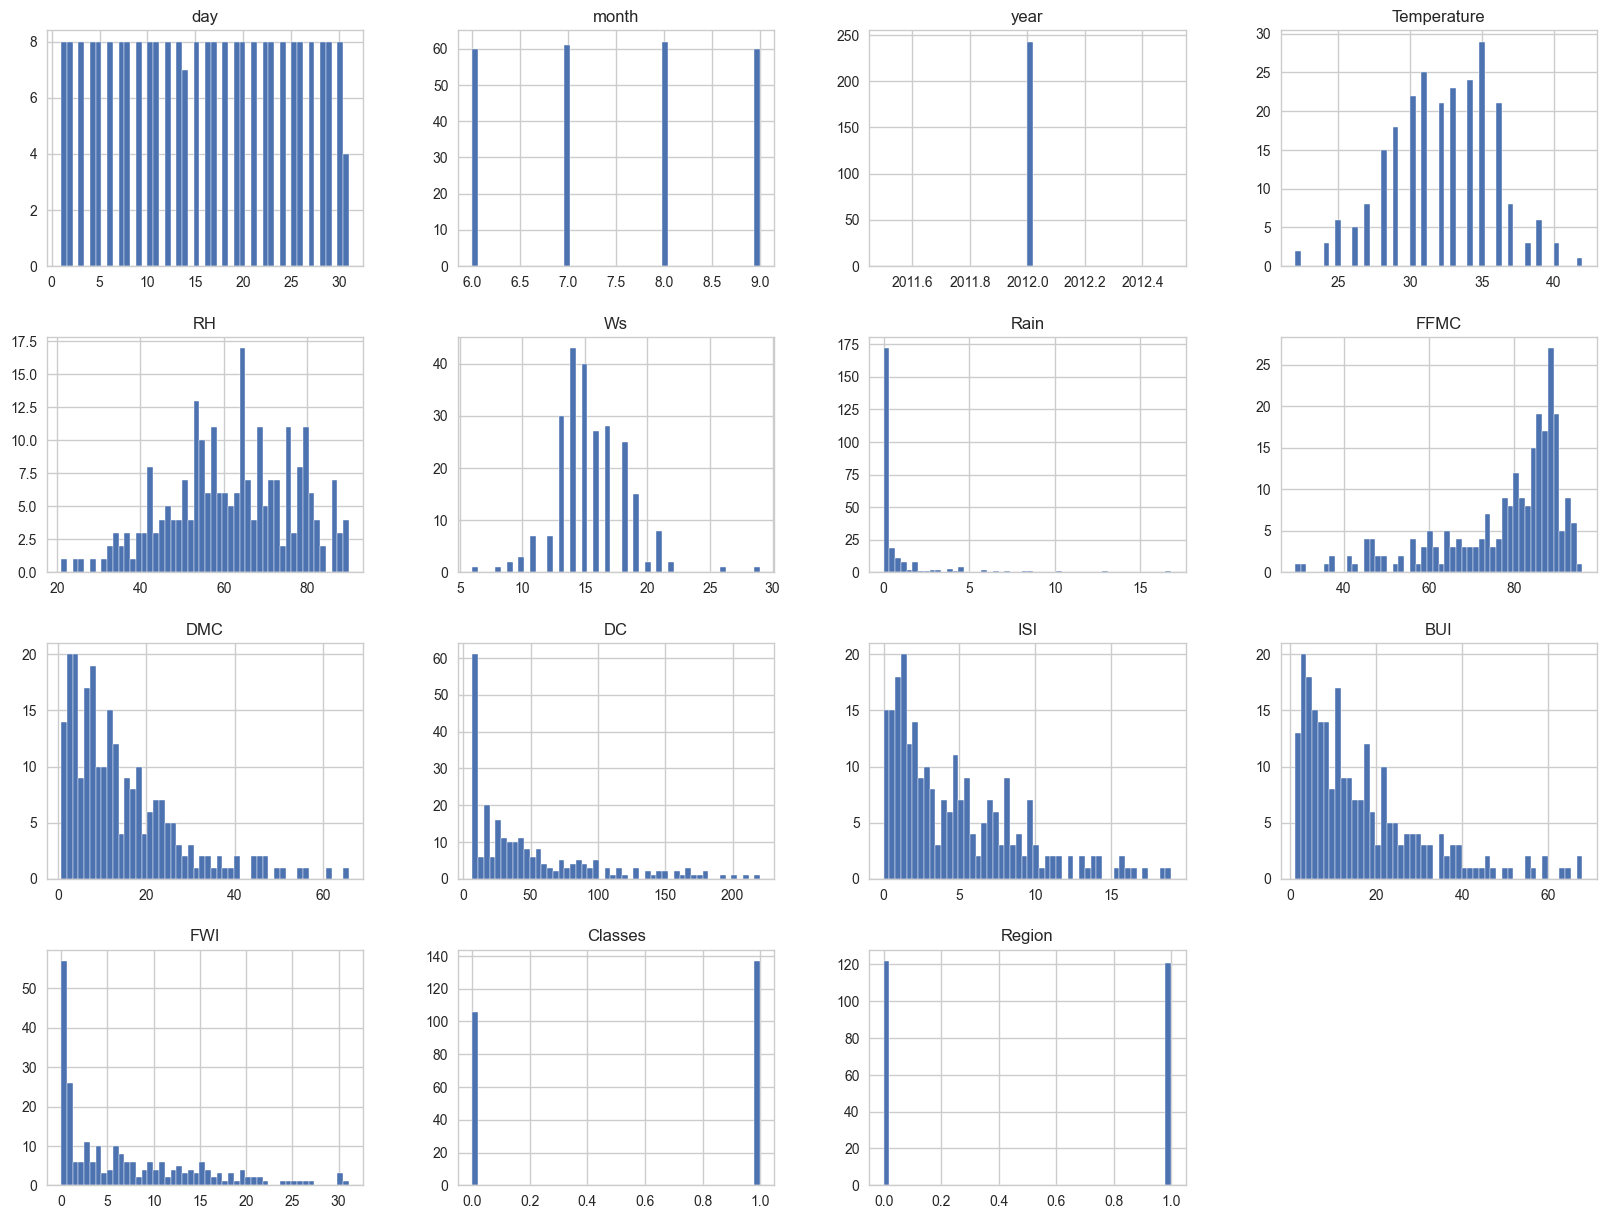

In [306]:
#4.2) Density plot for all features
plt.style.use('seaborn-v0_8-whitegrid')
df.hist(bins=50,figsize=(20,15))
plt.show()


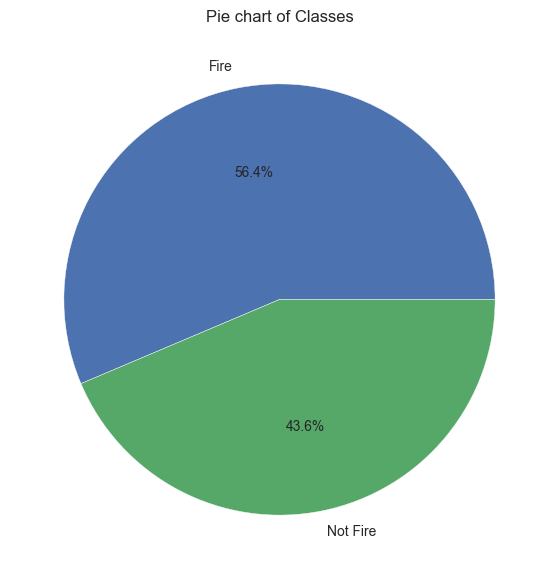

In [307]:
#4.3) Piechart = For classification data column = 'Classes'
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(df['Classes'].value_counts(),labels=classlabels,autopct='%1.1f%%')
plt.title('Pie chart of Classes')
plt.show()

Co-relation :  <bound method DataFrame.corr of      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  

<Axes: >

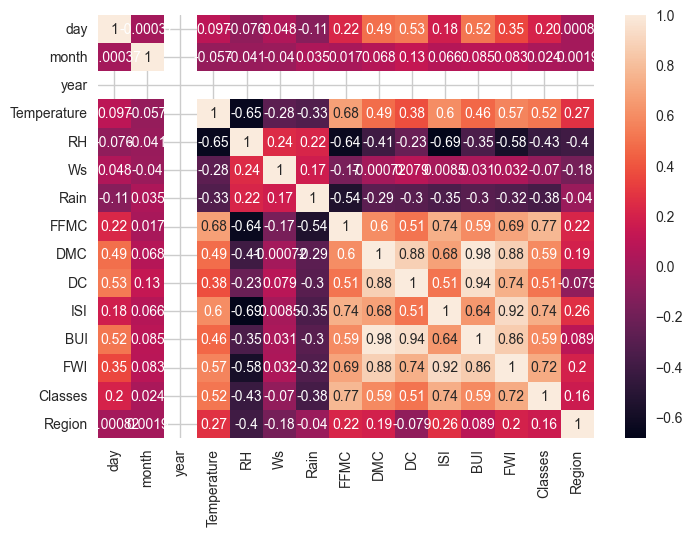

In [308]:
#4.4) Corelation of all features
# Corelation values
print('Co-relation : ',df.corr)

#Heatmap
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

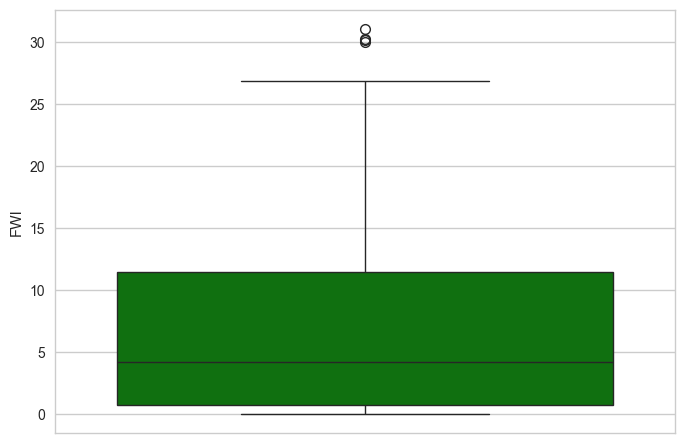

In [309]:
#4.5) Box plot - To find out the outliers
sns.boxplot( df['FWI'],color='green')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

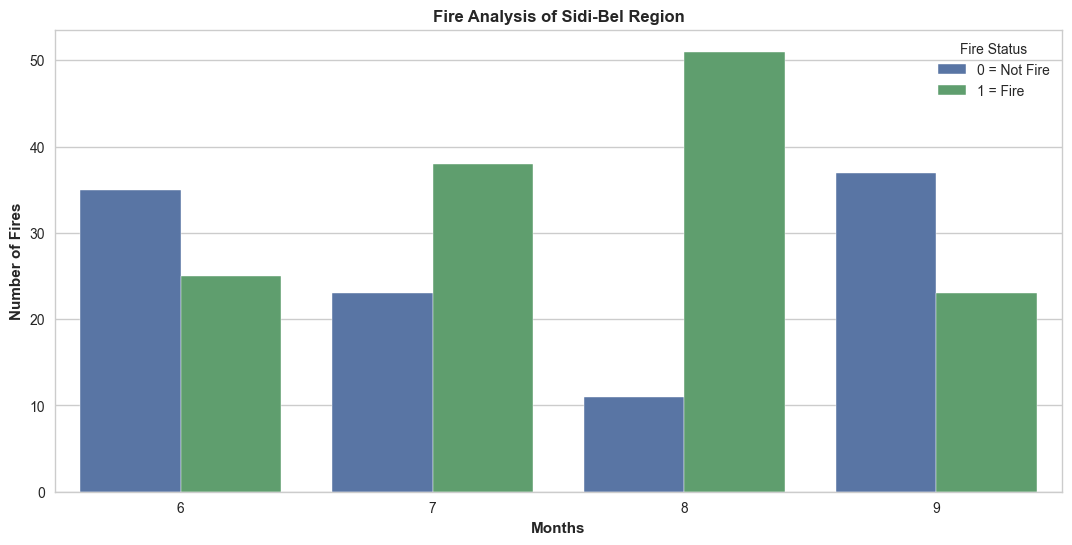

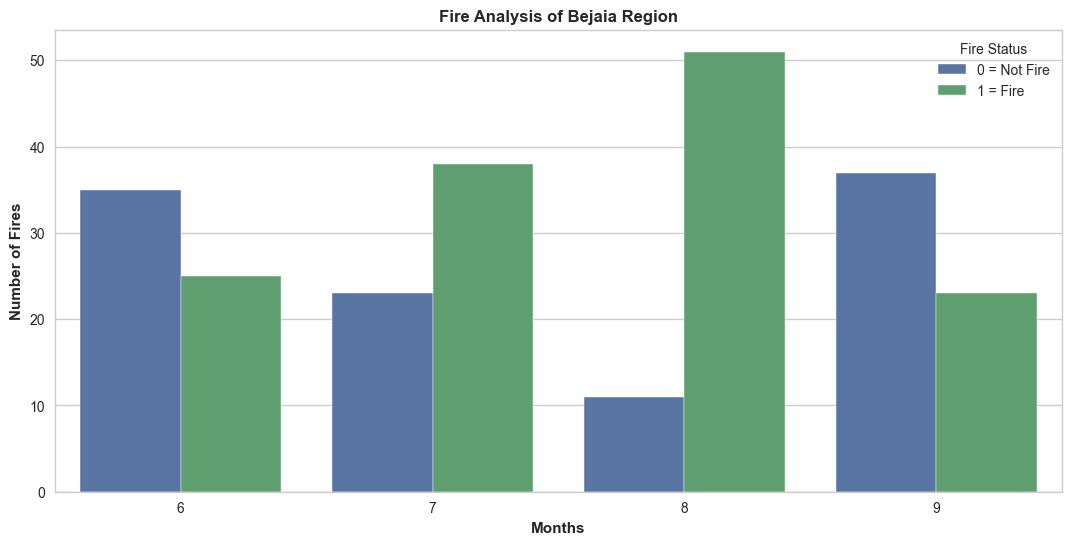

In [310]:

#4.6)  Number of Fires by month 
# Output Observation
# - It is observed that the months of July and August had the most number of forest fires both both the regions.
# - September had lesser fires
# - df['Region'] gives only the 'Region' column where 'Region'==1
# - df.loc[df['Region']==1] gives the Entire Dataframe (with all features) where 'Region'==1

#4.6.1)  where Region = 1(Sidi-Bel region)
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.legend(title='Fire Status', labels=['0 = Not Fire', '1 = Fire'])
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Region",weight='bold')

#4.6.2)  where Region = 0(Bejaia region)
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.legend(title='Fire Status', labels=['0 = Not Fire', '1 = Fire'])
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejaia Region",weight='bold')



In [311]:
# Step 5) - Delete input features(day, month, year) which do not have a direct effect on the output features
# 5.1) Drop day, month and year columns. They dont play an important role in the prection of the output = FWI
df=df.drop(columns=['day','month','year']);
df.head()

#5.2) Save the Cleaned dataset into another CSV file
# - index=False, dont reIndex, maintain the origional numbering/index of rows.
df.to_csv('./resources/2-Algerian_forest_fires_dataset_CLEANED.csv',index=False)

In [ ]:
# Step 6) Reload the data from the CSV file saved in the previous step
df=pd.read_csv('./resources/2-Algerian_forest_fires_dataset_CLEANED.csv')
df.head()



,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
# Step 7) Split the data into dependent and independent features
# x = inputs = Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region
# y = output (FWI)

# Input features
x=df.drop('FWI',axis=1)
x.head()

# Output features
y=df['FWI']
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [323]:
# Step 8) Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


Co-relation
             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes

<Axes: >

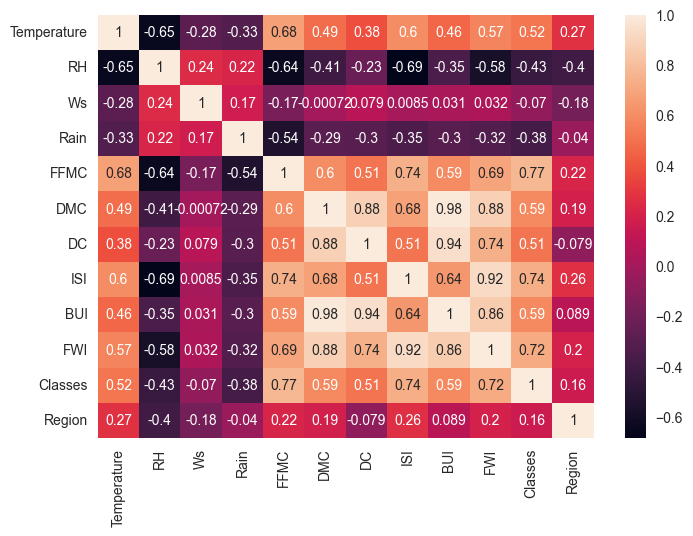

In [ ]:
# Step 9) Multi-colinearity
# Drop input features from the dataframe which are highly( > 85%) co-rrelated
# - If two features are highly & positively co-related(i.e. when one increases then other increases and when the other decreases, the other decreases), 
# - then its better to use only one of those features to predict the output feature
# We can get the corelation from :-
# df.corr() and
# sns.heatmap(df.corr(),annot=True)

#9.1) Find corelation of all features
print('Co-relation')
print(x_train.corr())

#9.2) Find heatmap to see the corelation in graphical format
sns.heatmap(df.corr(),annot=True)

In [ ]:
#9.3) Create a function to list all input features whose colinearity is above the threshold
# - threshold = 0.85, (assume)
# - use abs() function to take into account both positive and negative colinearity
# Output Observation: 
# - Input features DC & BUI have a positive coreation of 0.94 which is above the threshold value
def findInputFeaturesAboveThresholdCorelation(dataset, threshold):
    featuresAboveThreshold = set()
    corr_matrix = dataset.corr()
    for col in range(len(corr_matrix.columns)):
        for row in range(col):
            if abs(corr_matrix.iloc[col, row]) > threshold: 
                colname = corr_matrix.columns[col]
                featuresAboveThreshold.add(colname)
    return featuresAboveThreshold


featuresAboveThreshold=findInputFeaturesAboveThresholdCorelation(x_train,0.85)
print('featuresAboveThreshold = ',featuresAboveThreshold)

featuresAboveThreshold =  {'DC', 'BUI'}


In [332]:
#9.4) Drop the columns = DC, BUI from training dataset = x_train
x_train.drop(featuresAboveThreshold,axis=1,inplace=True)
x_test.drop(featuresAboveThreshold,axis=1,inplace=True)

In [ ]:
# Step 10) Standardization / Scaling

# 10.1) Standardization / Scaling
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'X_train After Scaling')

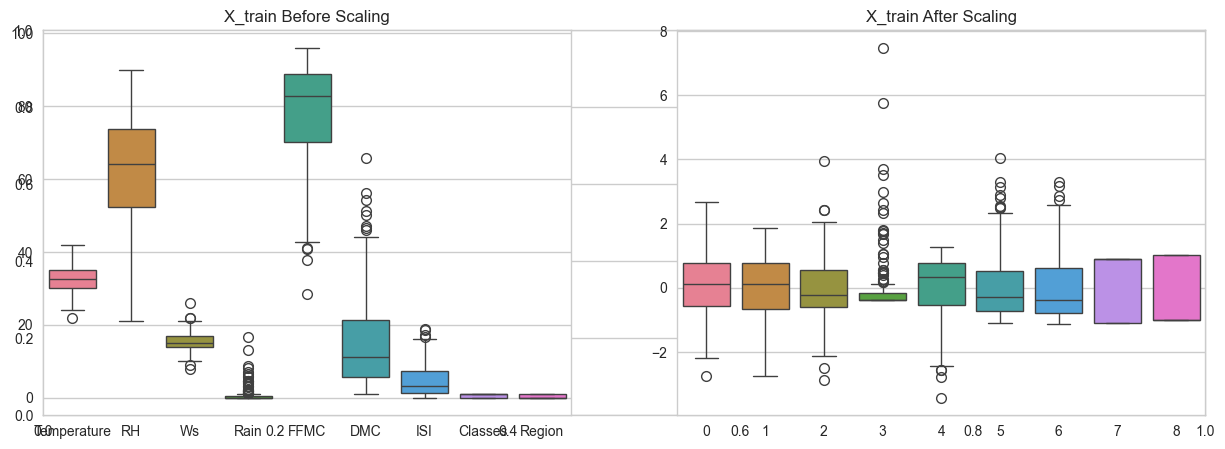

In [ ]:
#10.2) Box Plot to understand the effect of Standard Scaler
# - Do Box Plots between x_train (unscaled data) and x_train_scaled (scaled data)

# Output Observation
# - Before Scaling Box Plot
# - The range of values in Before Scaling is very large - 0 to 100 (Y-axis)

# - After Scaling Box Plot
# - The range of values after scaling is lesser = -2 to 9 (Y-axis)
# - This is good, Scaling has brought all the input features to comparable levels.

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')


Mean absolute error 0.5468236465249982
R2 Score 0.9847657384266951
Runtime params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


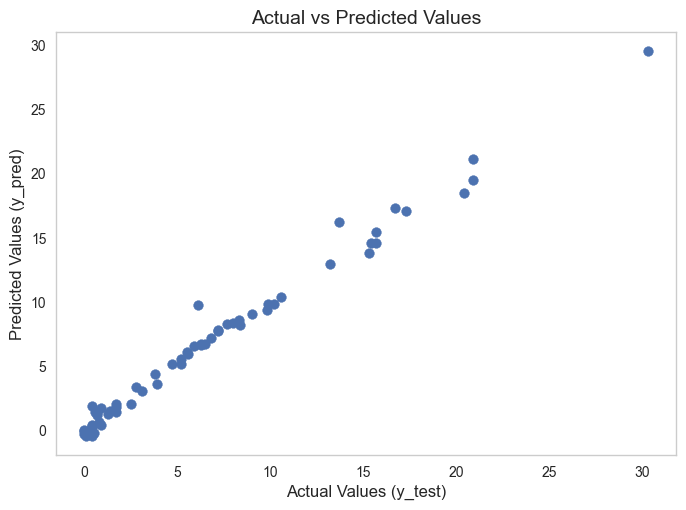

In [354]:
# Step 12)  Use Machine Learning Algorithms

# 12.1) Linear Regression Machine Learning Algorithm
# Output Observation
# - MAE = 0.54 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.984 = Model is 98.4% accurate - (This means the model is good.)
linearRegression=LinearRegression()
linearRegression.fit(x_train_scaled,y_train)
y_pred=linearRegression.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Linear Regression Machine Learning Algorithm 
print('Runtime params: ',linearRegression.get_params());

Mean absolute error 1.1331759949144085
R2 Score 0.9492020263112388
Runtime params:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


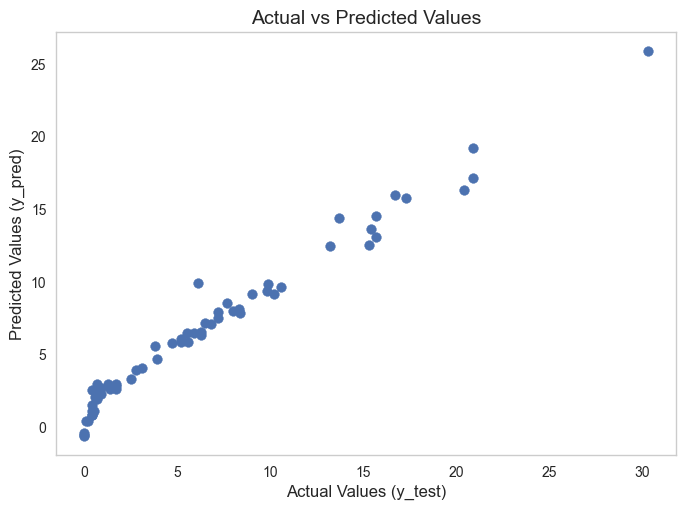

In [353]:
#12.2) Lasso Regression Machine Learning Algorithm
# Output Observation
# - MAE = 0.54 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.949 = Model is 94.9% accurate - (This means the model is good.)
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Lasso Machine Learning Algorithm 
print('Runtime params: ',lasso.get_params());

Mean absolute error 0.6199701158263436
R2 Score 0.9820946715928274
Runtime params:  {'alphas': 'warn', 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 'deprecated', 'n_jobs': None, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}


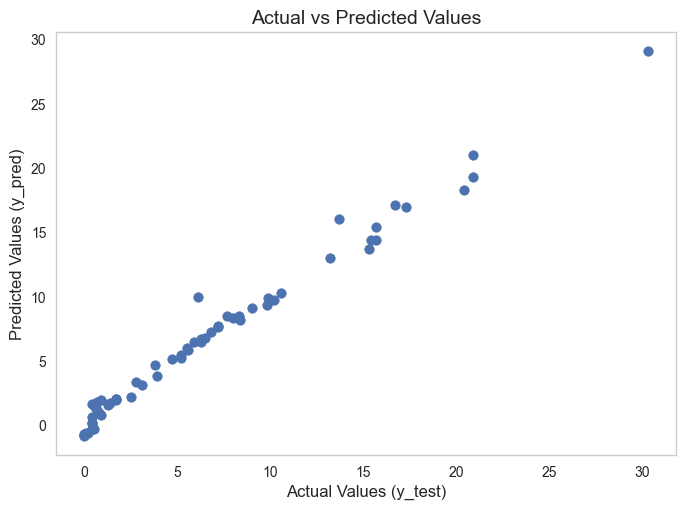

In [352]:
#12.3) Cross Validation Lasso Machine Learning Algorithm
# Output Observation
# - MAE = 0.61 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.982 = Model is 98.2% accurate - (This means the model is good.)
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Cross Validation Lasso Machine Learning Algorithm 
print('Runtime params: ',lassocv.get_params());

Mean absolute error 0.5642305340105723
R2 Score 0.9842993364555512
Runtime params:  {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


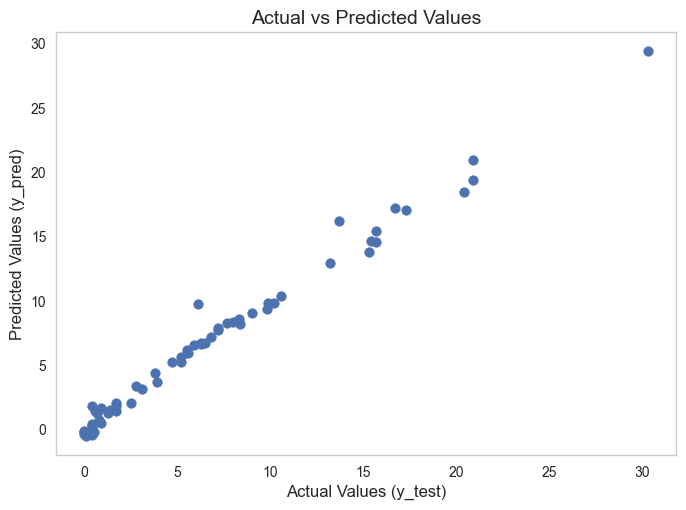

In [351]:
#12.4) Ridge Machine Learning Algorithm
# Output Observation
# - MAE = 0.56 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.984 = Model is 98.4% accurate - (This means the model is good.)
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Ridge Machine Learning Algorithm 
print('Runtime params: ',ridge.get_params());

Mean absolute error 0.5642305340105723
R2 Score 0.9842993364555512
Runtime params:  {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': False}


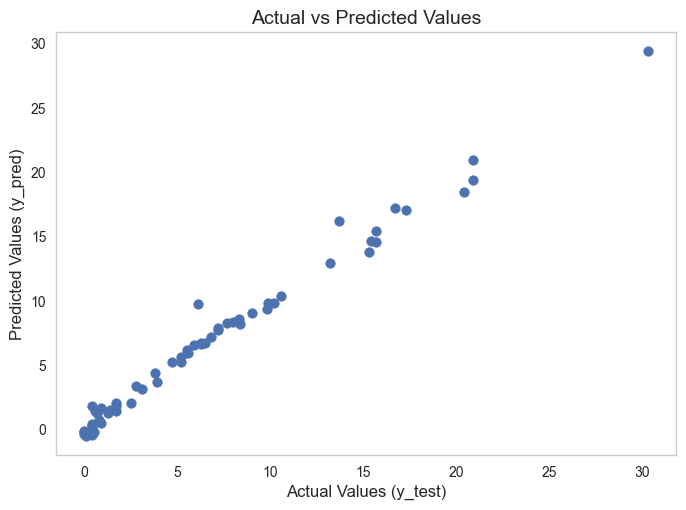

In [350]:
#12.5) Cross Validation Ridge Machine Learning Algorithm
# Output Observation
# - MAE = 0.56 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.984 = Model is 98.4% accurate - (This means the model is good.)
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Cross Validation Ridge Machine Learning Algorithm 
print('Runtime params: ',ridgecv.get_params());

Mean absolute error 1.8822353634896003
R2 Score 0.8753460589519703
Runtime params:  {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': False}


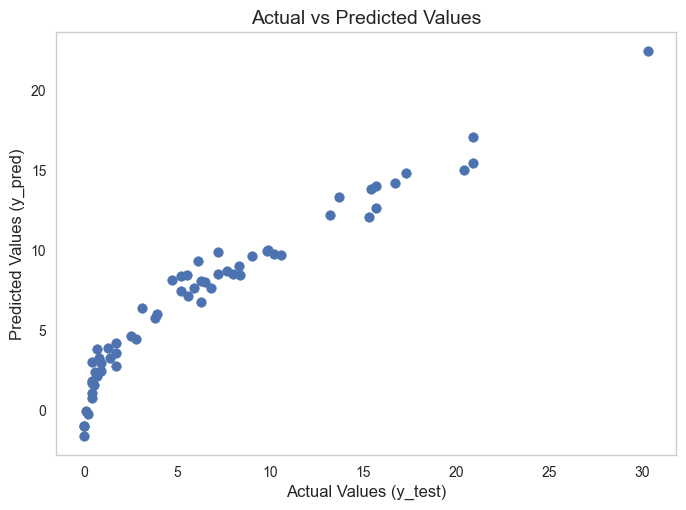

In [ ]:
#12.6) Elasticnet Regression Machine Learning Algorithm
# IMPORTANT - Elasticnet is a combination of algorithms (1) Ridge (2) Lasso

# Output Observation
# - MAE = 1.88 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.875 = Model is 87.5% accurate - (This means the model is good.)
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Cross Validation Ridge Machine Learning Algorithm 
print('Runtime params: ',ridgecv.get_params());

Mean absolute error 0.6575946731430905
R2 Score 0.9814217587854941
Runtime params:  {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': False}


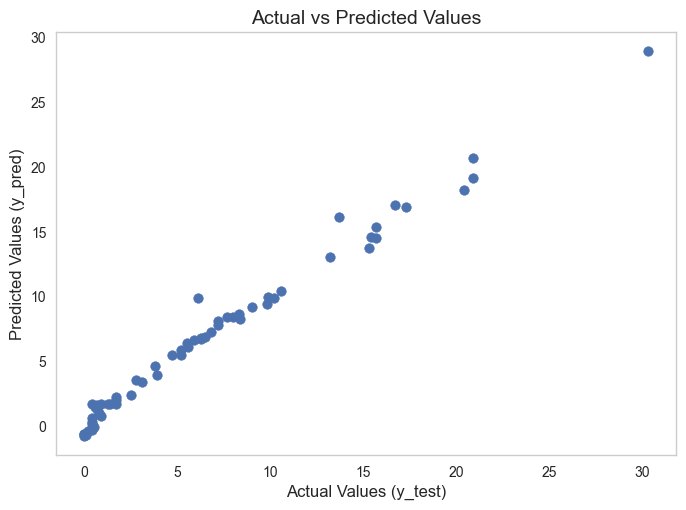

In [ ]:
#12.7) Elasticnet Regression Cross Validation Machine Learning Algorithm
# Output Observation
# - MAE = 0.65 = Very Less - (This means the model is good)
# - R2 Score (Performance of Model) = 0.9814 = Model is 98.14% accurate - (This means the model is good.)
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.grid(False)   
plt.title("Actual vs Predicted Values", fontsize=14)

# Print all the runtime parameters of the Cross Validation Ridge Machine Learning Algorithm 
print('Runtime params: ',ridgecv.get_params());

In [359]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11